<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


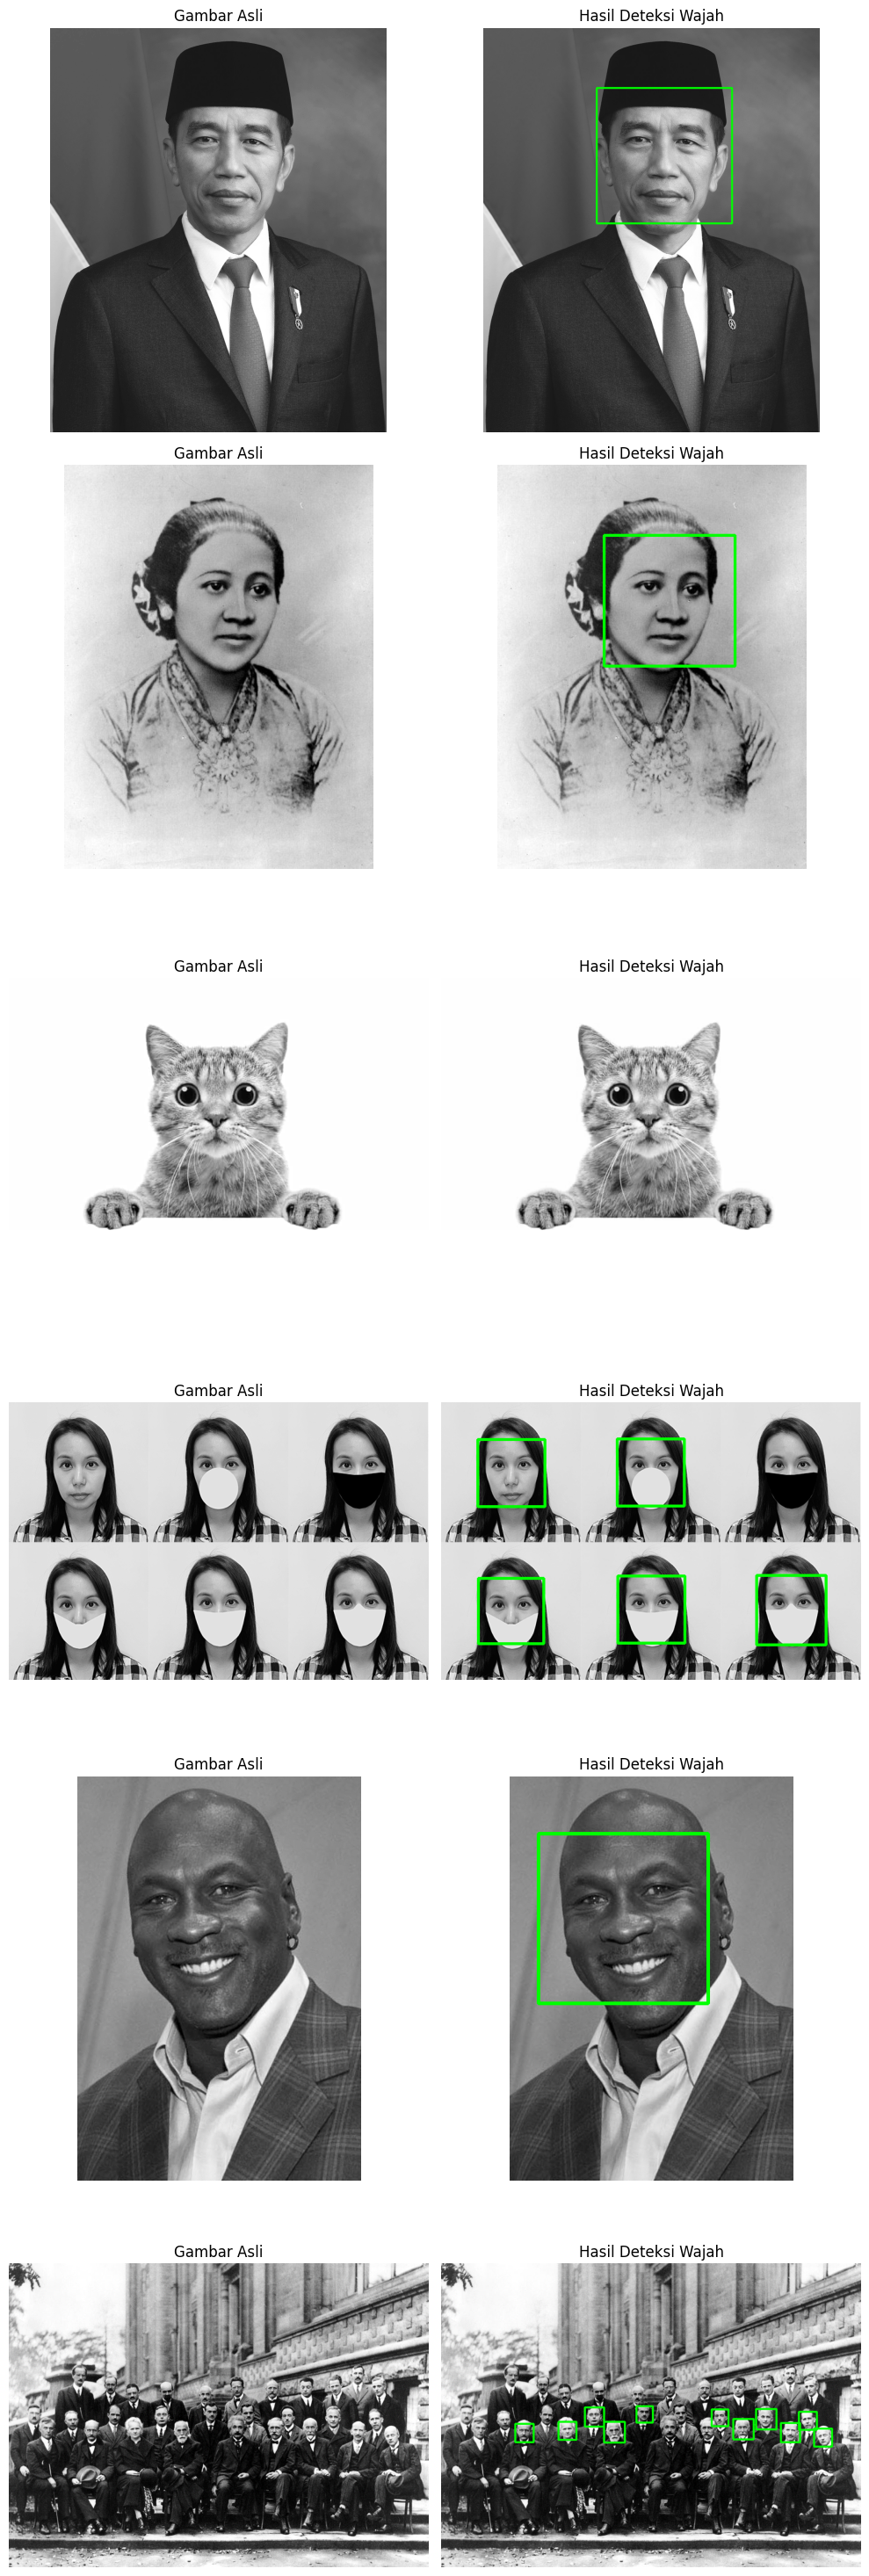

In [2]:
# 2
import cv2
import matplotlib.pyplot as plt

def detect_faces(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Membuat model untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=18, minSize=(20, 20))

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    image_with_detections = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    for (x, y, w, h) in faces:
        cv2.rectangle(image_with_detections, (x, y), (x+w, y+h), (0, 255, 0), 4)

    return image_with_detections

images = [
    "/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/mask.png",
    "/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg"
]

fig, axes = plt.subplots(len(images), 2, figsize=(10, len(images) * 5))

for idx, image_path in enumerate(images):
    img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_detected = detect_faces(image_path)

    axes[idx, 0].imshow(img_original, cmap='gray')
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title("Gambar Asli")

    axes[idx, 1].imshow(img_detected)
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title("Hasil Deteksi Wajah")

plt.tight_layout()
plt.show()


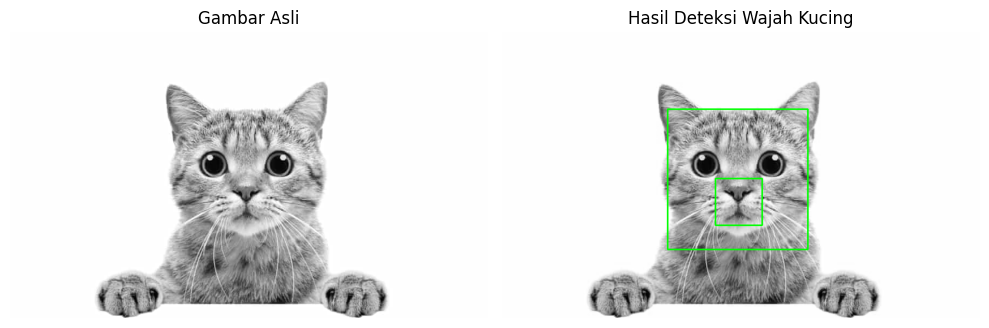

In [3]:
# 3
import cv2
import matplotlib.pyplot as plt

def detect_cat_face(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Membuat model wajah kucing
    cat_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

    cat_faces = cat_face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(75, 75))

    for (x, y, w, h) in cat_faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    gray_with_color_rectangles = cv2.cvtColor(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2RGB)
    for (x, y, w, h) in cat_faces:
        cv2.rectangle(gray_with_color_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return gray_with_color_rectangles

image_path = "/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg"

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
axes[0].imshow(img_original, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Gambar Asli")

img_detected = detect_cat_face(image_path)
axes[1].imshow(img_detected)
axes[1].axis('off')
axes[1].set_title("Hasil Deteksi Wajah Kucing")

plt.tight_layout()
plt.show()


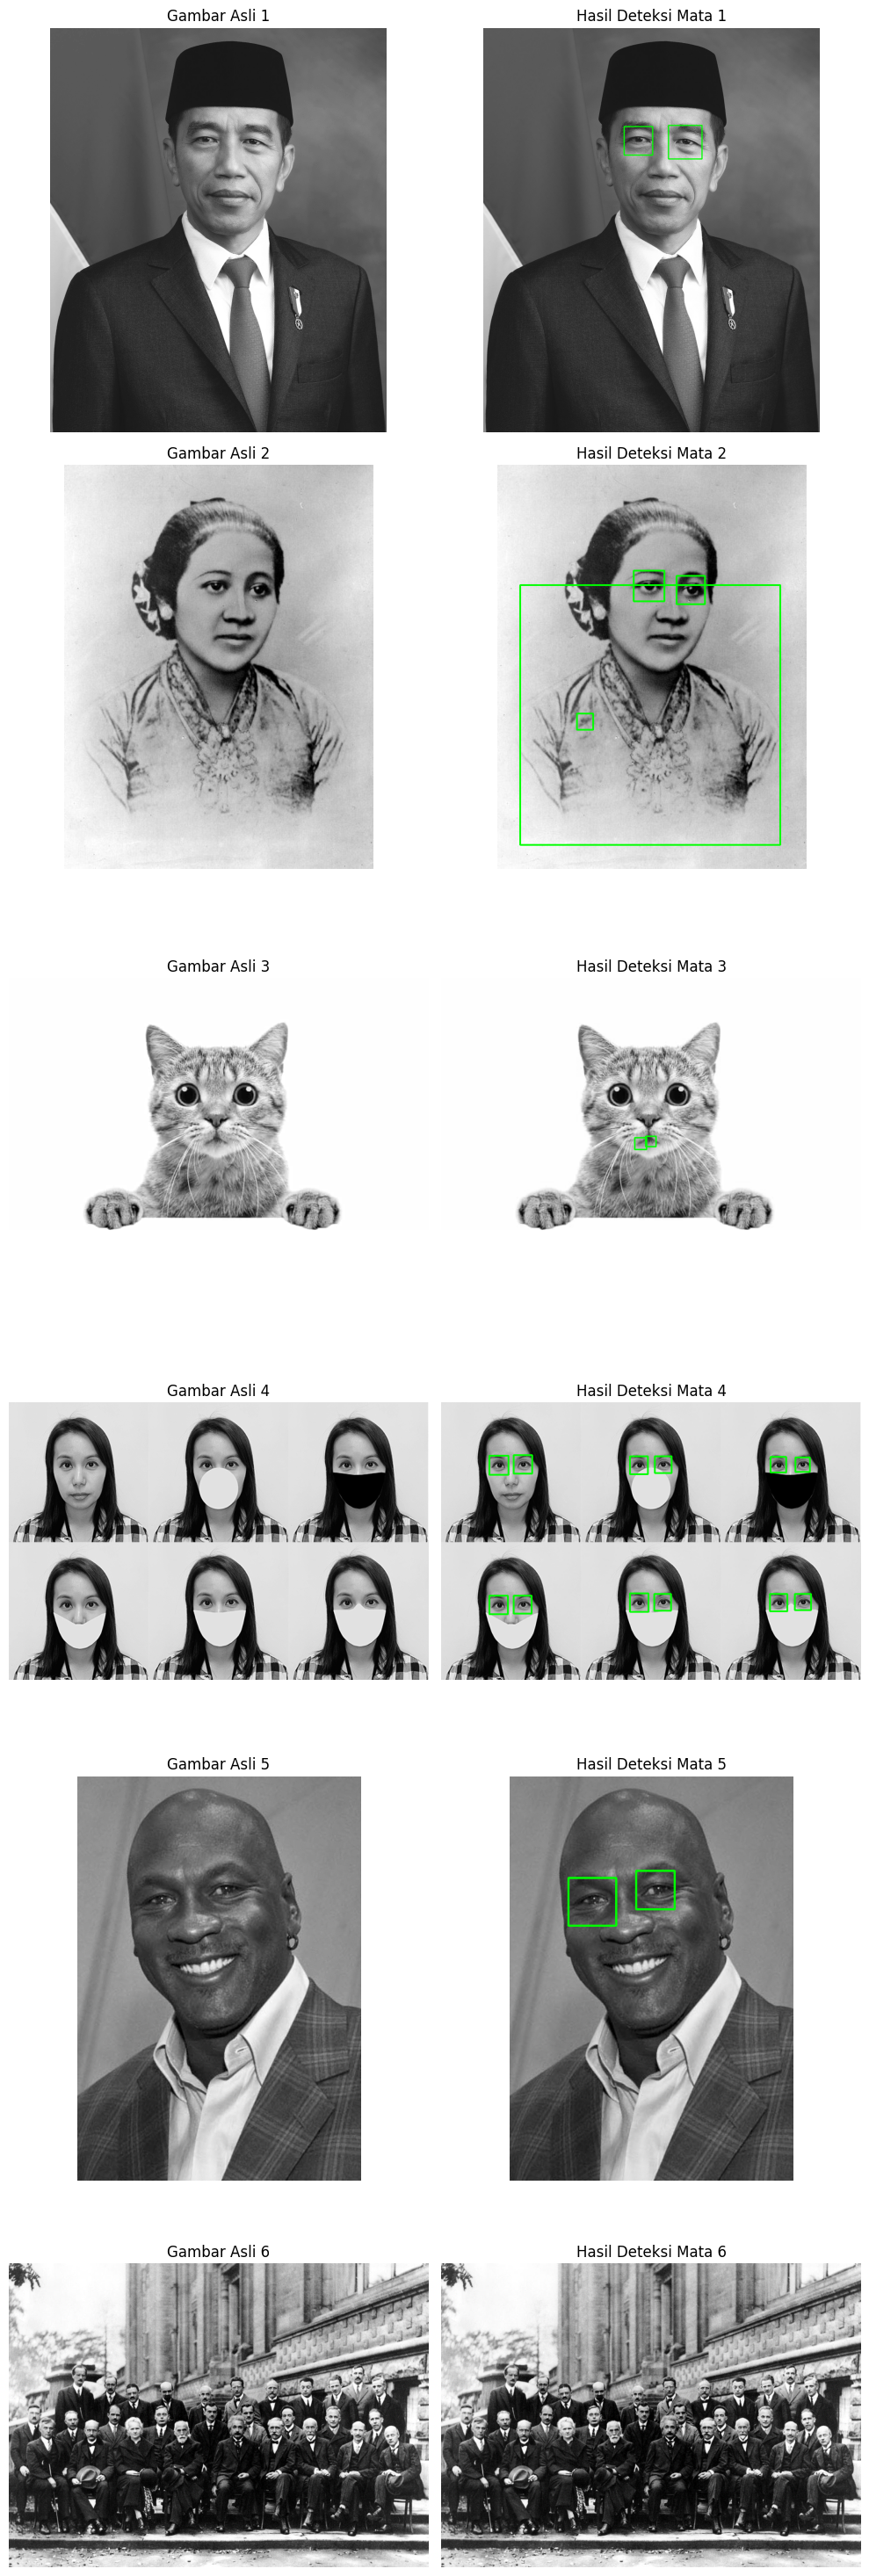

In [4]:
# 4
import cv2
import matplotlib.pyplot as plt

def detect_eyes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

    gray_with_color_rectangles = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    for (x, y, w, h) in eyes:
        cv2.rectangle(gray_with_color_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return gray_with_color_rectangles

images = [
    "/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/mask.png",
    "/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg"
]

fig, axes = plt.subplots(len(images), 2, figsize=(10, len(images) * 5))

for idx, image_path in enumerate(images):
    img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_detected = detect_eyes(image_path)

    axes[idx, 0].imshow(img_original, cmap='gray')
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title(f"Gambar Asli {idx+1}")

    # Menampilkan hasil deteksi mata di kolom kanan (abu-abu dengan kotak hijau)
    axes[idx, 1].imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title(f"Hasil Deteksi Mata {idx+1}")

plt.tight_layout()
plt.show()


**5. Google Colab: Access Webcam for Images and Video**


In [5]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [6]:
# helper for converting between differencet image data type
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [7]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [8]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

**Webcam Videos**

Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

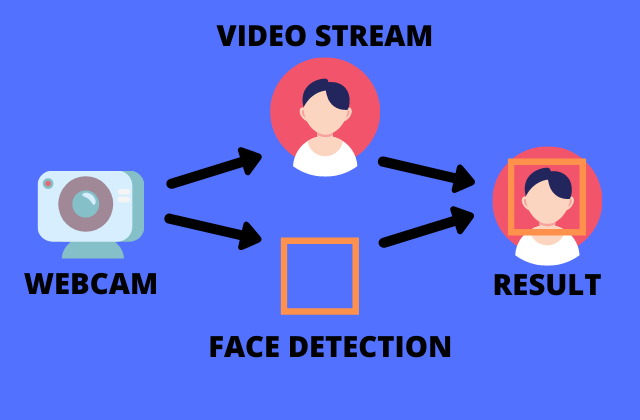</center>

In [9]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [11]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

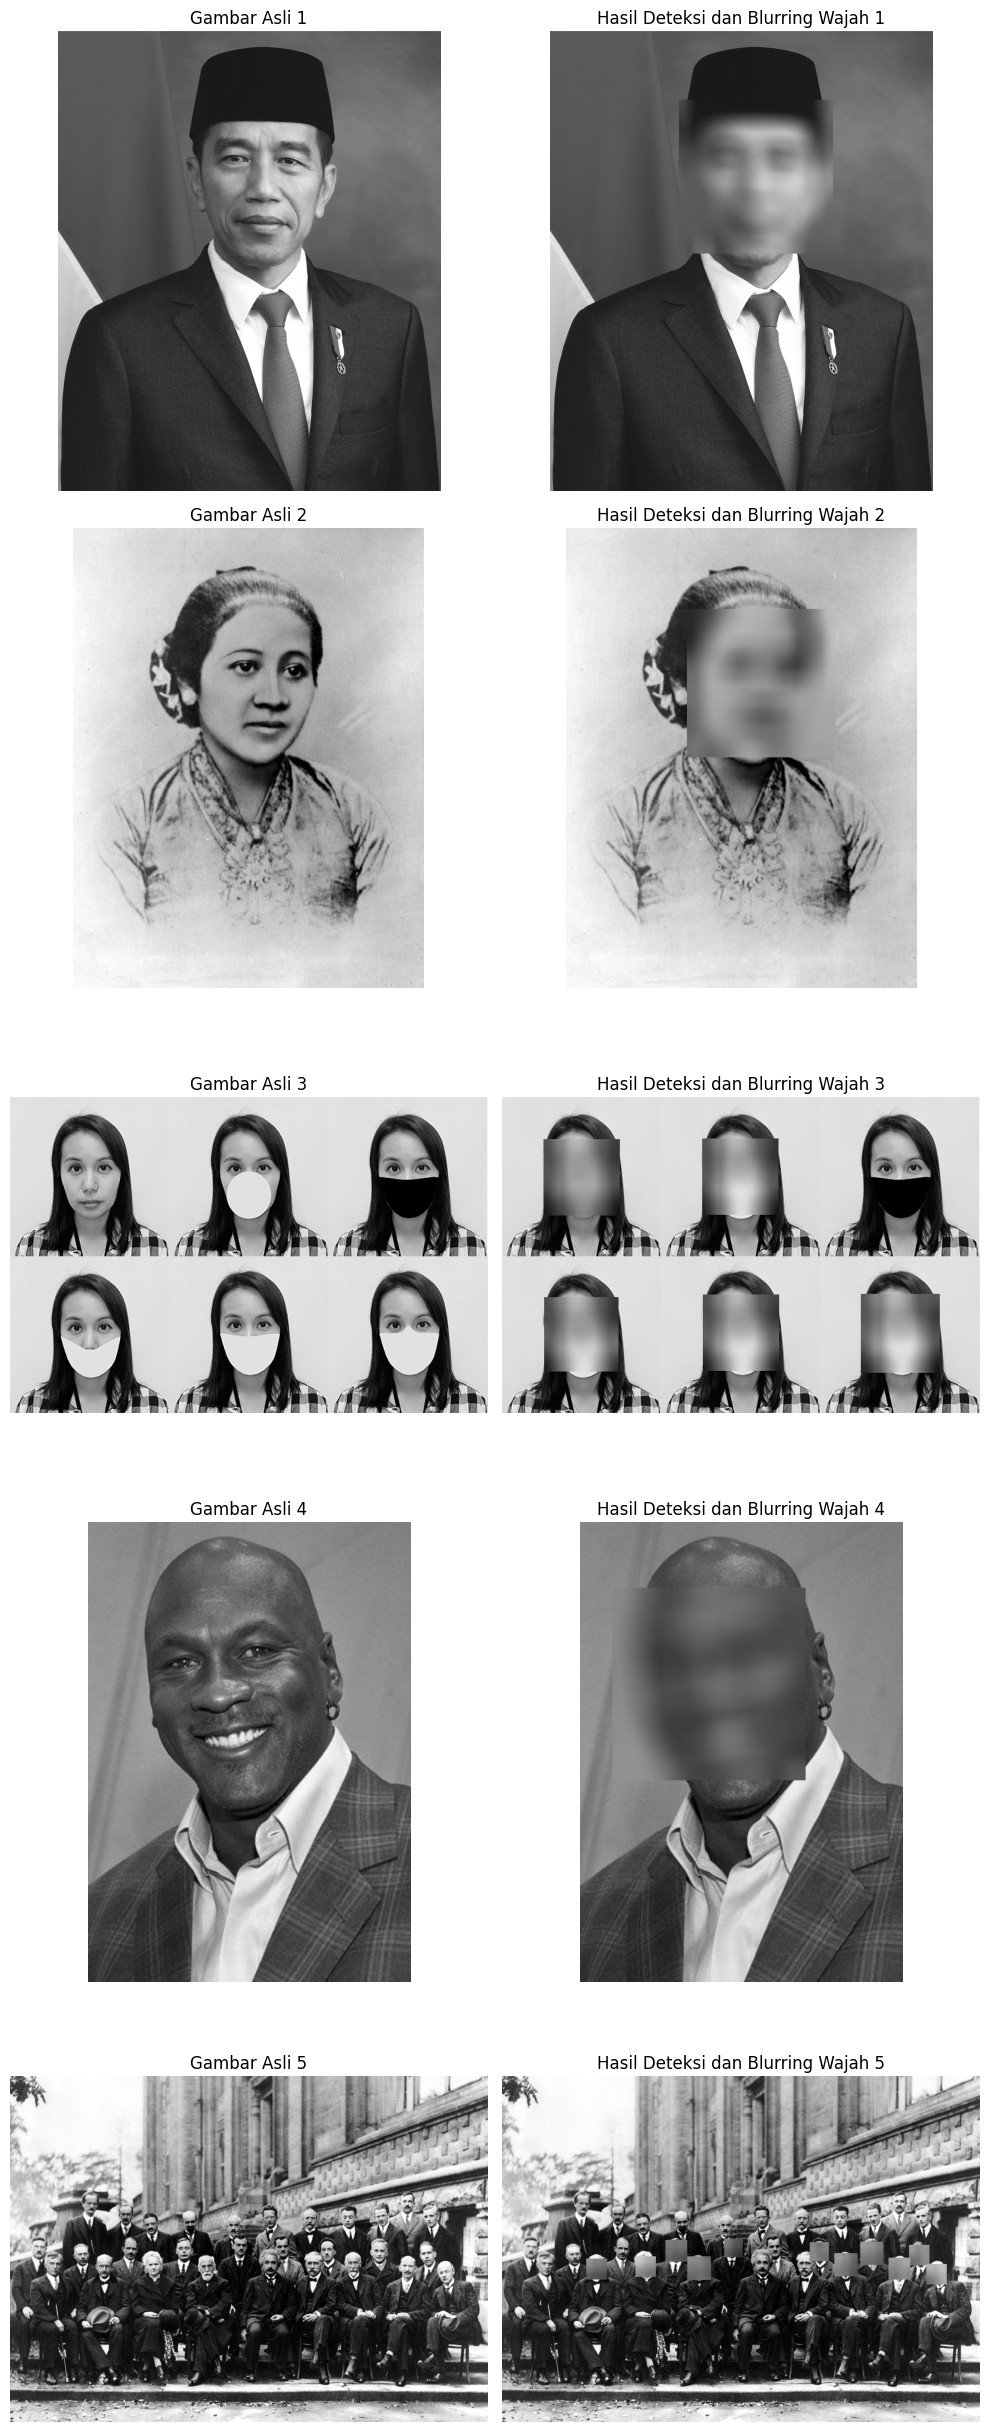

In [12]:
# 6
import cv2
import matplotlib.pyplot as plt

def blur_faces(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Model deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=18, minSize=(20, 20))

    # Melakukan blurring pada area wajah yang terdeteksi
    for (x, y, w, h) in faces:
        # Mengambil area wajah
        face_region = gray[y:y+h, x:x+w]
        face_region = cv2.GaussianBlur(face_region, (51, 51), 30)
        gray[y:y+h, x:x+w] = face_region

    return gray

images = [
    "/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/mask.png",
    "/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg",
    "/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg"
]

fig, axes = plt.subplots(len(images), 2, figsize=(10, len(images) * 5))

for idx, image_path in enumerate(images):
    img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_blurred = blur_faces(image_path)

    axes[idx, 0].imshow(img_original, cmap='gray')
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title(f"Gambar Asli {idx+1}")

    axes[idx, 1].imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title(f"Hasil Deteksi dan Blurring Wajah {idx+1}")

plt.tight_layout()
plt.show()


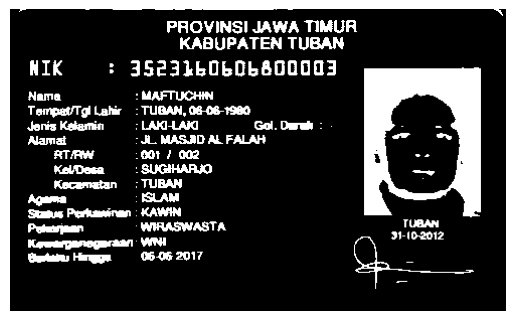

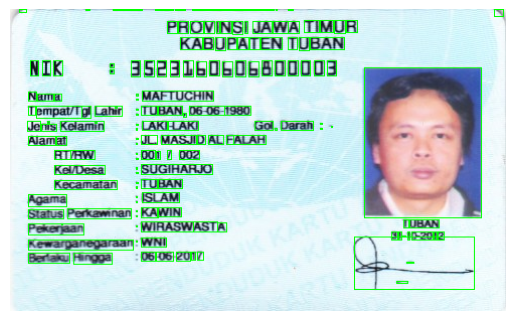

In [13]:
# 7
import cv2
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More/ktp4.png'

img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menggunakan threshold untuk memisahkan karakter
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Menggunakan contour untuk menemukan karakter
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [14]:
!pip install pytesseract

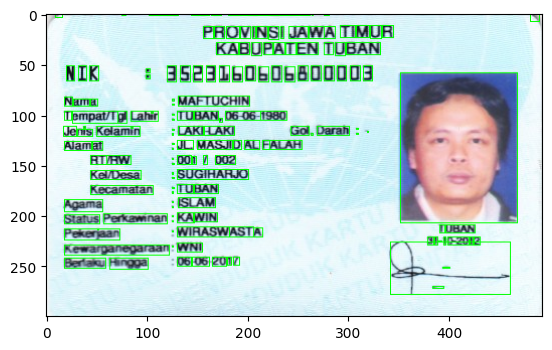

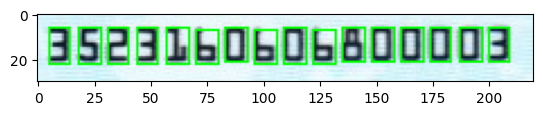

In [15]:
# 8
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

nik = img.copy()
x, y, w, h = 115, 45, 220, 30
nik_crop = nik[y:y+h, x:x+w]

plt.imshow(cv2.cvtColor(nik_crop, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
import tensorflow as tf
import pickle

# Load dataset MNIST
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalisasi data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Tambahkan channel (untuk grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Simpan data ke file pickle
with open("X_train.pickle", "wb") as f:
    pickle.dump(X_train, f)

with open("Y_train.pickle", "wb") as f:
    pickle.dump(Y_train, f)

with open("X_test.pickle", "wb") as f:
    pickle.dump(X_test, f)

with open("Y_test.pickle", "wb") as f:
    pickle.dump(Y_test, f)

print("Data berhasil disimpan dalam file pickle.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data berhasil disimpan dalam file pickle.


In [17]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load data dari file pickle
with open("X_train.pickle", "rb") as f:
    X_train = pickle.load(f)

with open("Y_train.pickle", "rb") as f:
    Y_train = pickle.load(f)

with open("X_test.pickle", "rb") as f:
    X_test = pickle.load(f)

with open("Y_test.pickle", "rb") as f:
    Y_test = pickle.load(f)

# One-hot encode label
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Dimensi input
width, height = 28, 28

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)  # Menyesuaikan ukuran input
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)  # 10 kelas untuk MNIST

# Optimizer
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
model.fit(X_train, Y_train, epochs=5, verbose=1, validation_data=(X_test, Y_test))

# Simpan model
model.save('mnist_model.h5')
print("Model berhasil disimpan sebagai 'mnist_model.h5'")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.7810 - loss: 0.7544 - val_accuracy: 0.9676 - val_loss: 0.1066
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9667 - loss: 0.1106 - val_accuracy: 0.9790 - val_loss: 0.0697
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9770 - loss: 0.0766 - val_accuracy: 0.9846 - val_loss: 0.0489
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0.9864 - val_loss: 0.0410
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9860 - loss: 0.0469 - val_accuracy: 0.9849 - val_loss: 0.0439


Model berhasil disimpan sebagai 'mnist_model.h5'


Model berhasil dimuat.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



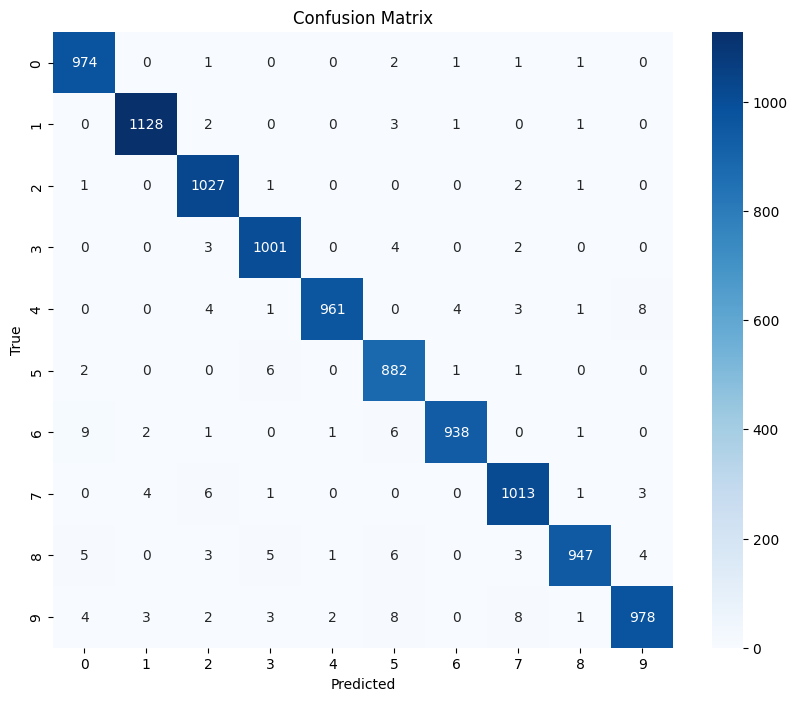

In [18]:
import pickle
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data uji dari file pickle
with open("X_test.pickle", "rb") as f:
    X_test = pickle.load(f)

with open("Y_test.pickle", "rb") as f:
    Y_test = pickle.load(f)

# Muat model yang telah dilatih
model = load_model('mnist_model.h5')
print("Model berhasil dimuat.")

# Prediksi pada dataset uji
predictions = model.predict(X_test, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = Y_test

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])
print("\nClassification Report:\n")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Tugas kelompok


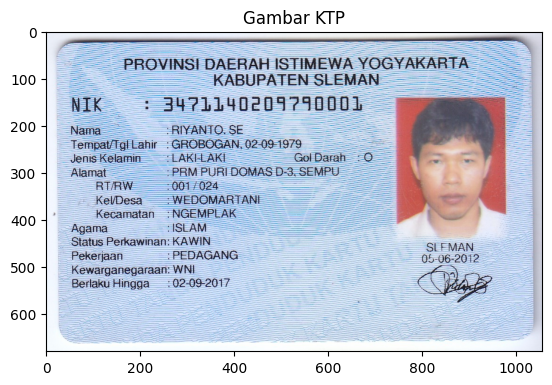

In [19]:
image_path = "/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More/ktp.png"

# Baca dan tampilkan gambar
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Gambar KTP")
plt.show()

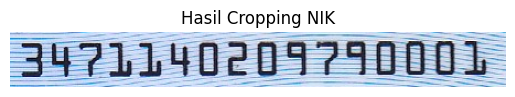

In [20]:
# Mententukan koordinat cropping (x, y, w, h)
x, y, w, h = 240, 130, 450, 50

# cropping
cropped_image = image[y:y+h, x:x+w]

cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_image_rgb)
plt.axis("off")
plt.title("Hasil Cropping NIK")
plt.show()

In [21]:
cv2.imwrite("/content/nik_cropped.png", cropped_image)
print("Hasil cropping disimpan!")

Hasil cropping disimpan!


In [22]:
import cv2
import numpy as np
from keras.models import load_model

# Load model MNIST
model = load_model('mnist_model.h5')
print("Model MNIST berhasil dimuat.")

# Fungsi untuk segmentasi dan pengenalan NIK
def recognize_nik_with_mnist(image_path, model, width=28, height=28):
    # Baca gambar NIK (crop e-KTP agar hanya NIK terlihat)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Preprocessing gambar
    _, img_thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)  # Thresholding
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])  # Urutkan kontur kiri ke kanan

    nik = ""
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if h > 10:  # Filter kontur kecil
            char = img_thresh[y:y+h, x:x+w]
            char = cv2.resize(char, (width, height))  # Resize ke ukuran input MNIST
            char = char.reshape(1, width, height, 1) / 255.0  # Normalisasi
            prediction = model.predict(char)  # Prediksi
            nik += str(np.argmax(prediction))  # Tambahkan hasil prediksi ke string NIK

    return nik

image_path = "/content/nik_cropped.png"
predicted_nik = recognize_nik_with_mnist(image_path, model)
print("NIK yang dikenali:", predicted_nik)


Model MNIST berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
NIK yang dikenali: 3421140207270101


Model MNIST berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


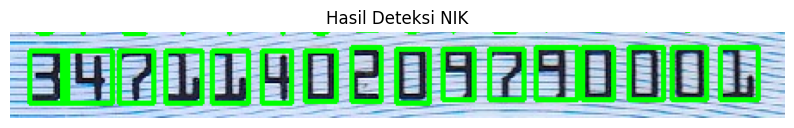

NIK yang dikenali: 3421140207270101


In [23]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load model MNIST
model = load_model('mnist_model.h5')
print("Model MNIST berhasil dimuat.")

# Fungsi untuk segmentasi dan pengenalan NIK dengan rectangle
def recognize_nik_with_rectangle(image_path, model, width=28, height=28):
    image = cv2.imread(image_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Preprocessing gambar
    _, img_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])  # Urutkan kontur kiri ke kanan

    nik = ""
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if h > 10:  # Filter kontur kecil
            # Crop dan preprocess setiap karakter
            char = img_thresh[y:y+h, x:x+w]
            char = cv2.resize(char, (width, height))
            char = char.reshape(1, width, height, 1) / 255.0  # Normalisasi

            # Prediksi dengan model MNIST
            prediction = model.predict(char)
            digit = str(np.argmax(prediction))
            nik += digit

            # Gambar rectangle di sekitar karakter
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Kotak warna hijau
            cv2.putText(image, digit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Teks di atas kotak

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title("Hasil Deteksi NIK")
    plt.show()

    return nik

image_path = "/content/nik_cropped.png"

predicted_nik = recognize_nik_with_rectangle(image_path, model)
print("NIK yang dikenali:", predicted_nik)
